<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

I am hired by the a local educational consulting company in California. The company provides the service to students and help them get in their ideal colleges. The company asks me to analyaze SAT and ACT performance for various districts in California and provide information to the parents, so the parents would know the districts they can send their children to get higher SAT/ACT scores.

The customers (parents) in this company pay great attention to the education of their childen. They are willing to spend money on education and relocate to different cities in the state to help the childen have better learning environment. This project aims to identify the districts that have good student performance on the SAT/ACT tests (from Grade 12 students). I will be the one who provides the recommendations to the parents.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Many high school students in CA are scrambling to schedule SAT and ACT tests this fall even though some private and public colleges, including both of California’s massive state university systems, say they are not required during the pandemic. Some students and their parents still worry that not taking the standardized entrance exams — or not getting a chance to increase previous scores — will hurt their college application process. They hope the SAT/ACT would strengthen their college applications.

### Choose your Data

* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School


The datasets describe the data for various school districts in California.

The ACT Scores dataset include the numbers of tesk takers for grade 11 and 12, the average ACT scores for four tests (English, mathematics, reading, science) and the numbers & precents of test takers whose ACT composite scores are greater or equal to 21 for each school in different districts in CA.

The SAT Scores dataset include the numbers of test taksers for grade 11 and 12 and the numbers & percents of students who met or exceeded the benchmark for two tests (Evidence-Based Reading & Writing and New SAT Math).

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [85]:
# Code:
def my_mean(sample):
    return sum(sample) / len(sample)

In [86]:
my_mean([1, 3, 5, 7, 10])

5.2

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [87]:
# Code:
def my_stdev(sample):
    n = len(sample)
    mean = my_mean(sample)
    var = sum((x - mean) ** 2 for x in sample) / n
    stdev = var ** 0.5
    return stdev

In [88]:
my_stdev([1, 3, 5, 7, 10])

3.1240998703626617

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [89]:
# Code:
def clean_number(x):
    return float(x.strip('%'))/100

In [90]:
clean_number('50%')

0.5

In [91]:
clean_number('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [92]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [93]:
# import datasets:
dfa = pd.read_csv('./data/act_2019_ca.csv')

In [94]:
dfs = pd.read_csv('./data/sat_2019_ca.csv')

In [95]:
# Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
dfa.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
0,3.370000e+13,33,3366993,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1,1.960000e+13,19,1964212,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2,1.560000e+13,15,1563776,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
3,4.370000e+13,43,4369666,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23.0,22.0,22.0,23.0,34.0,64.15,2018-19
4,1.960000e+13,19,1964733,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21.0,20.0,23.0,22.0,11.0,57.89,2018-19


In [96]:
dfs.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
0,6.620000e+12,6,661598,630046,S,Colusa Alternative Home,Colusa Unified,Colusa,18,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
1,6.620000e+12,6,661606,634758,S,Maxwell Sr High,Maxwell Unified,Colusa,29,10,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19
2,1.960000e+13,19,1964733,1930924,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,...,174,42.0,24.14,12.0,6.90,14.0,13.73,11.0,6.32,2018-19
3,1.960000e+13,19,1964733,1931476,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,...,275,97.0,35.27,37.0,13.45,18.0,15.93,35.0,12.73,2018-19
4,1.960000e+13,19,1964733,1931856,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18,14,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19


In [97]:
# Check for missing values.
dfa.isnull().sum()

CDS             0
CCode           0
CDCode          0
SCode         522
RType           0
SName         580
DName          58
CName           0
Enroll12        0
NumTstTakr      0
AvgScrRead    888
AvgScrEng     888
AvgScrMath    888
AvgScrSci     888
NumGE21       888
PctGE21       888
Year            0
dtype: int64

In [98]:
dfa.shape

(2308, 17)

In [99]:
dfa.dropna(inplace=True)

In [100]:
dfa.shape

(1016, 17)

In [101]:
dfs.isnull().sum()

CDS                        0
CCode                      0
CDCode                     0
SCode                      0
RType                      0
SName                    597
DName                     58
CName                      0
Enroll12                   0
NumTSTTakr12               0
NumERWBenchmark12        857
PctERWBenchmark12        857
NumMathBenchmark12       857
PctMathBenchmark12       857
Enroll11                   0
NumTSTTakr11               0
NumERWBenchmark11        843
PctERWBenchmark11        843
NumMathBenchmark11       843
PctMathBenchmark11       843
TotNumBothBenchmark12    857
PctBothBenchmark12       857
TotNumBothBenchmark11    843
PctBothBenchmark11       843
Year                       0
dtype: int64

In [102]:
dfs.shape

(2578, 25)

In [103]:
dfa.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
3,4.370000e+13,43,4369666,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23.0,22.0,22.0,23.0,34.0,64.15,2018-19
4,1.960000e+13,19,1964733,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21.0,20.0,23.0,22.0,11.0,57.89,2018-19
5,1.980000e+13,19,1976968,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15.0,15.0,17.0,16.0,3.0,9.09,2018-19
6,1.960000e+13,19,1964733,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18.0,18.0,18.0,17.0,5.0,31.25,2018-19
13,1.970000e+13,19,1965136,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29.0,29.0,25.0,25.0,34.0,94.44,2018-19


In [104]:
dfs.dropna(inplace=True)

In [105]:
dfs.shape

(1198, 25)

In [106]:
# Display the data types of each feature.
dfa.dtypes

CDS           float64
CCode           int64
CDCode          int64
SCode         float64
RType          object
SName          object
DName          object
CName          object
Enroll12        int64
NumTstTakr      int64
AvgScrRead    float64
AvgScrEng     float64
AvgScrMath    float64
AvgScrSci     float64
NumGE21       float64
PctGE21       float64
Year           object
dtype: object

In [107]:
dfs.dtypes

CDS                      float64
CCode                      int64
CDCode                     int64
SCode                      int64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                   int64
NumTSTTakr12               int64
NumERWBenchmark12        float64
PctERWBenchmark12        float64
NumMathBenchmark12       float64
PctMathBenchmark12       float64
Enroll11                   int64
NumTSTTakr11               int64
NumERWBenchmark11        float64
PctERWBenchmark11        float64
NumMathBenchmark11       float64
PctMathBenchmark11       float64
TotNumBothBenchmark12    float64
PctBothBenchmark12       float64
TotNumBothBenchmark11    float64
PctBothBenchmark11       float64
Year                      object
dtype: object

In [108]:
# Rename columns
dfa.rename(str.lower, axis='columns', inplace=True)

In [109]:
dfa.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,year
3,4.370000e+13,43,4369666,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23.0,22.0,22.0,23.0,34.0,64.15,2018-19
4,1.960000e+13,19,1964733,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21.0,20.0,23.0,22.0,11.0,57.89,2018-19
5,1.980000e+13,19,1976968,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15.0,15.0,17.0,16.0,3.0,9.09,2018-19
6,1.960000e+13,19,1964733,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18.0,18.0,18.0,17.0,5.0,31.25,2018-19
13,1.970000e+13,19,1965136,1996321.0,S,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29.0,29.0,25.0,25.0,34.0,94.44,2018-19


In [110]:
# Drop unnecessary columns
dfa.drop(columns=['cds', 'ccode', 'cdcode', 'scode', 'rtype', 'year'], inplace=True)

In [111]:
dfs.rename(str.lower, axis='columns', inplace=True)

In [112]:
dfs.drop(columns=['cds', 'ccode', 'cdcode', 'scode', 'rtype', 'year', 'enroll11', 'numtsttakr11', 'numerwbenchmark11', 'pcterwbenchmark11', 'nummathbenchmark11', 'pctmathbenchmark11', 'totnumbothbenchmark11', 'pctbothbenchmark11'], inplace=True)

In [113]:
dfa.to_csv('act_2019_ca_clean.csv')

In [114]:
dfs.to_csv('sat_2019_ca_clean.csv')

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

#### **ACT dataset**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sname**|*object*|ACT 2019 CA|School Name| 
|**dname**|*object*|ACT 2019 CA|District Name|
|**cname**|*object*|ACT 2019 CA|County Name| 
|**enroll12**|*integer*|ACT 2019 CA|Enrollment of Grade 12| 
|**numtsttakr**|*integer*|ACT 2019 CA|Number of Test Takers| 
|**avgscrread**|*integer*|ACT 2019 CA|Average ACT  English Score| 
|**avgscreng**|*integer*|ACT 2019 CA|Average ACT Reading Score| 
|**avgscrmath**|*integer*|ACT 2019 CA|Average ACT Math Score| 
|**avgscrsci**|*integer*|ACT 2019 CA|Average ACT Science Score| 
|**numge21**|*object*|ACT 2019 CA|Number of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21.| 
|**pctge21**|*object*|ACT 2019 CA|Percent of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21.| 


**SAT dataset**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sname**|*object*|SAT 2019 CA|School Name| 
|**dname**|*object*|SAT 2019 CA|District Name|
|**cname**|*object*|SAT 2019 CA|County Name| 
|**enroll12**|*integer*|SAT 2019 CA|Enrollment of Grade 12| 
|**numtsttakr12**|*integer*|SAT 2019 CA|Number of Test Takers Grade 12| 
|**numerwbenchmark12**|*integer*|SAT 2019 CA|The number meeting the Evidence-Based Reading & Writing (ERW) benchmark| 
|**pctmathbenchmark12**|*integer*|SAT 2019 CA|The percent of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.| 
|**nummathbenchmark12**|*integer*|SAT 2019 CA|The number of students who met or exceeded the benchmark for the New SAT Math test format as of March 2016 for Grade 12.| 
|**pctmathbenchmark12**|*integer*|SAT 2019 CA|The percent of students who met or exceeded the benchmark for SAT Math test for Grade 12.| 
|**totnumbothbenchmark12**|*object*|SAT 2019 CA|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.| 
|**pctbothbenchmark12**|*object*|SAT 2019 CA|The percent of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.| 



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [115]:
dfa.describe()

,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,371.831693,79.144685,21.870079,21.017717,21.270669,21.189961,43.673228,51.306850
std,206.213129,66.574849,3.823038,4.209031,3.499833,3.335189,50.111339,26.534076
min,0.000000,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000
25%,173.000000,33.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.570000
50%,382.000000,58.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.860000
75%,524.000000,105.000000,25.000000,24.000000,24.000000,24.000000,55.000000,74.700000
max,1135.000000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000


In [116]:
dfs.describe()

,enroll12,numtsttakr12,numerwbenchmark12,pcterwbenchmark12,nummathbenchmark12,pctmathbenchmark12,totnumbothbenchmark12,pctbothbenchmark12
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,341.508347,138.655259,95.383139,67.391085,67.093489,45.252529,63.510017,42.790392
std,209.944022,106.173762,76.676621,20.773616,63.885664,23.592428,61.702275,23.600005
min,25.000000,15.000000,2.000000,2.470000,0.000000,0.000000,0.000000,0.000000
25%,141.000000,60.000000,36.000000,51.867500,18.000000,25.707500,17.000000,23.337500
50%,339.000000,113.000000,75.000000,70.530000,45.000000,43.560000,42.000000,40.535000
75%,498.000000,186.000000,138.000000,85.155000,97.000000,64.515000,91.000000,61.540000
max,1135.000000,932.000000,475.000000,100.000000,390.000000,100.000000,385.000000,100.000000


In [118]:
dfa['cname'].value_counts()

Los Angeles        272
San Diego           80
Orange              69
Riverside           56
San Bernardino      51
Santa Clara         44
Alameda             39
Sacramento          38
Contra Costa        32
Fresno              27
Kern                26
San Joaquin         26
Ventura             21
San Mateo           21
San Francisco       16
Tulare              16
Sonoma              14
Placer              14
Monterey            13
Merced              12
Stanislaus          12
Santa Barbara       10
Solano               9
Santa Cruz           9
Imperial             7
Marin                7
San Luis Obispo      7
Madera               6
Kings                5
Butte                5
El Dorado            5
Shasta               4
Napa                 4
Yolo                 4
Sutter               4
Humboldt             3
Tehama               3
Yuba                 3
Glenn                2
Amador               2
Lake                 2
Mendocino            2
Nevada               2
Modoc      

In [120]:
dfa.groupby('enroll12').mean()['numge21']

enroll12
0         1.0
18        8.0
20        3.0
25        1.0
34        5.0
        ...  
1007     95.0
1050     59.0
1083    111.0
1120    154.0
1135     35.0
Name: numge21, Length: 544, dtype: float64

In [131]:
dfa.sort_values(['pctge21'], ascending=False).head(10)

,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
1985,Santa Susana High,Simi Valley Unified,Ventura,252,26,28.0,27.0,25.0,26.0,26.0,100.00
1900,River Valley Charter,Lakeside Union Elementary,San Diego,50,15,28.0,26.0,26.0,27.0,15.0,100.00
1760,Oxford Academy,Anaheim Union High,Orange,200,56,31.0,32.0,30.0,30.0,56.0,100.00
2270,Whitney (Gretchen) High,ABC Unified,Los Angeles,165,55,31.0,31.0,30.0,29.0,54.0,98.18
1809,Piedmont High,Piedmont City Unified,Alameda,205,111,30.0,32.0,29.0,29.0,108.0,97.30
1025,Monta Vista High,Fremont Union High,Santa Clara,584,212,31.0,32.0,32.0,31.0,206.0,97.17
1992,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,321,121,31.0,32.0,31.0,30.0,117.0,96.69
1006,Mission San Jose High,Fremont Unified,Alameda,490,157,31.0,32.0,32.0,30.0,151.0,96.18
926,Lynbrook High,Fremont Union High,Santa Clara,415,172,32.0,32.0,32.0,31.0,165.0,95.93
241,Canyon Crest Academy,San Dieguito Union High,San Diego,635,409,30.0,31.0,30.0,29.0,392.0,95.84


In [133]:
county_is_la = dfa['cname'] == 'Los Angeles'
dfa.loc[county_is_la, :].sort_values("pctge21", ascending=False).head(10)

,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21
2270,Whitney (Gretchen) High,ABC Unified,Los Angeles,165,55,31.0,31.0,30.0,29.0,54.0,98.18
13,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29.0,29.0,25.0,25.0,34.0,94.44
829,La Canada High,La Canada Unified,Los Angeles,346,138,29.0,29.0,29.0,28.0,130.0,94.20
910,Los Angeles Center for Enriched Studies,Los Angeles Unified,Los Angeles,210,61,27.0,28.0,28.0,27.0,56.0,91.80
93,Arcadia High,Arcadia Unified,Los Angeles,829,192,28.0,29.0,28.0,27.0,175.0,91.15
995,Mira Costa High,Manhattan Beach Unified,Los Angeles,594,269,28.0,28.0,27.0,27.0,245.0,91.08
1963,San Marino High,San Marino Unified,Los Angeles,269,95,28.0,29.0,29.0,27.0,86.0,90.53
608,Gabrielino High,San Gabriel Unified,Los Angeles,433,69,28.0,28.0,26.0,26.0,62.0,89.86
1785,Palos Verdes Peninsula High,Palos Verdes Peninsula Unified,Los Angeles,609,217,28.0,28.0,27.0,27.0,194.0,89.40
280,Cerritos High,ABC Unified,Los Angeles,509,93,27.0,28.0,28.0,26.0,83.0,89.25


In [134]:
dfs['cname'].value_counts()

Los Angeles        337
San Diego           92
Orange              72
Riverside           64
San Bernardino      59
Santa Clara         52
Alameda             50
Sacramento          47
Fresno              34
San Joaquin         33
Contra Costa        32
Kern                27
Ventura             24
San Mateo           22
Tulare              18
Stanislaus          17
Sonoma              16
Placer              15
San Francisco       15
Monterey            14
Solano              13
Merced              13
Santa Barbara       11
Santa Cruz          10
San Luis Obispo      8
Butte                8
Madera               7
Kings                7
Shasta               7
Marin                7
Imperial             7
Yolo                 7
Napa                 6
El Dorado            5
Sutter               5
Humboldt             5
Lake                 3
Mendocino            3
Yuba                 3
Nevada               3
Glenn                3
Siskiyou             3
Calaveras            2
Tuolumne   

In [137]:
dfs.sort_values(['pctbothbenchmark12'], ascending=False).head(10)

,sname,dname,cname,enroll12,numtsttakr12,numerwbenchmark12,pcterwbenchmark12,nummathbenchmark12,pctmathbenchmark12,totnumbothbenchmark12,pctbothbenchmark12
272,William & Marian Ghidotti High,Nevada Joint Union High,Nevada,45,32,32.0,100.00,32.0,100.00,32.0,100.00
1747,Whitney (Gretchen) High,ABC Unified,Los Angeles,165,80,80.0,100.00,79.0,98.75,79.0,98.75
364,Monta Vista High,Fremont Union High,Santa Clara,584,197,193.0,97.97,195.0,98.98,191.0,96.95
144,Mission San Jose High,Fremont Unified,Alameda,490,149,147.0,98.66,142.0,95.30,142.0,95.30
1736,California Academy of Mathematics and Science,Long Beach Unified,Los Angeles,164,143,139.0,97.20,138.0,96.50,136.0,95.10
1100,Lynbrook High,Fremont Union High,Santa Clara,415,112,108.0,96.43,106.0,94.64,106.0,94.64
1102,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,321,88,86.0,97.73,84.0,95.45,83.0,94.32
401,Oxford Academy,Anaheim Union High,Orange,200,113,113.0,100.00,106.0,93.81,106.0,93.81
584,Henry M. Gunn High,Palo Alto Unified,Santa Clara,501,183,175.0,95.63,172.0,93.99,170.0,92.90
1192,Northwood High,Irvine Unified,Orange,623,226,220.0,97.35,209.0,92.48,208.0,92.04


In [138]:
county_is_la2 = dfs['cname'] == 'Los Angeles'
dfs.loc[county_is_la2, :].sort_values("pctbothbenchmark12", ascending=False).head(10)

,sname,dname,cname,enroll12,numtsttakr12,numerwbenchmark12,pcterwbenchmark12,nummathbenchmark12,pctmathbenchmark12,totnumbothbenchmark12,pctbothbenchmark12
1747,Whitney (Gretchen) High,ABC Unified,Los Angeles,165,80,80.0,100.00,79.0,98.75,79.0,98.75
1736,California Academy of Mathematics and Science,Long Beach Unified,Los Angeles,164,143,139.0,97.20,138.0,96.50,136.0,95.10
294,La Canada High,La Canada Unified,Los Angeles,346,170,163.0,95.88,158.0,92.94,156.0,91.76
1009,San Marino High,San Marino Unified,Los Angeles,269,120,114.0,95.00,112.0,93.33,110.0,91.67
321,South Pasadena Senior High,South Pasadena Unified,Los Angeles,369,181,175.0,96.69,160.0,88.40,159.0,87.85
1190,Eunice Sato Academy of Math & Science,Long Beach Unified,Los Angeles,103,79,75.0,94.94,71.0,89.87,69.0,87.34
233,Mira Costa High,Manhattan Beach Unified,Los Angeles,594,205,202.0,98.54,179.0,87.32,179.0,87.32
167,Palos Verdes Peninsula High,Palos Verdes Peninsula Unified,Los Angeles,609,260,249.0,95.77,228.0,87.69,225.0,86.54
281,Crescenta Valley High,Glendale Unified,Los Angeles,631,266,253.0,95.11,233.0,87.59,228.0,85.71
1301,Anderson W. Clark Magnet High,Glendale Unified,Los Angeles,224,92,87.0,94.57,79.0,85.87,78.0,84.78


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### county = dfa['cname'].value_counts()
county.head(10).plot(kind='barh')

plt.title('ACT - Top 10 districts', fontsize=20)
plt.ylabel('County', fontsize=16)
plt.xlabel('The number of school', fontsize=16)
plt.xticks(fontsize=8, rotation=0);

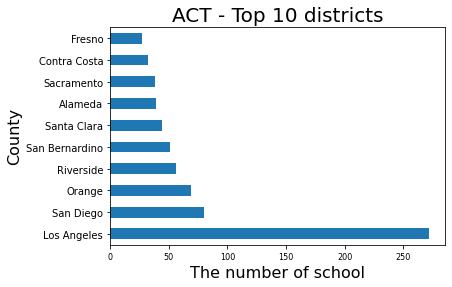

In [176]:
county = dfa['cname'].value_counts()
county.head(10).plot(kind='barh')

plt.title('ACT - Top 10 districts', fontsize=20)
plt.ylabel('County', fontsize=16)
plt.xlabel('The number of school', fontsize=16)
plt.xticks(fontsize=8, rotation=0);

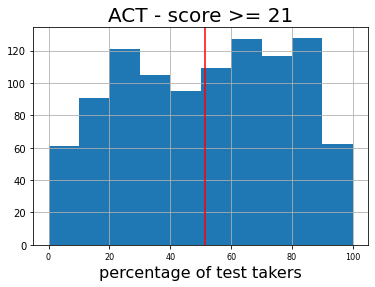

In [158]:
dfa['pctge21'].hist()
plt.axvline(dfa['pctge21'].mean(), color='r')

plt.title('ACT - score >= 21', fontsize=20)
plt.xlabel('percentage of test takers', fontsize=16)
plt.xticks(fontsize=8, rotation=0);

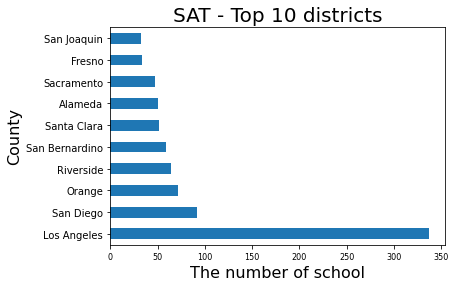

In [152]:
county2 = dfs['cname'].value_counts()
county2.head(10).plot(kind='barh')

plt.title('SAT - Top 10 districts', fontsize=20)
plt.ylabel('County', fontsize=16)
plt.xlabel('The number of school', fontsize=16)
plt.xticks(fontsize=8, rotation=0);

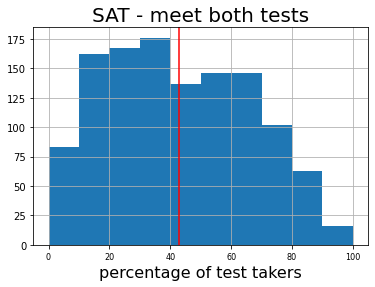

In [163]:
dfs['pctbothbenchmark12'].hist()
plt.axvline(dfs['pctbothbenchmark12'].mean(), color='r')

plt.title('SAT - meet both tests', fontsize=20)
plt.xlabel('percentage of test takers', fontsize=16)
plt.xticks(fontsize=8, rotation=0);

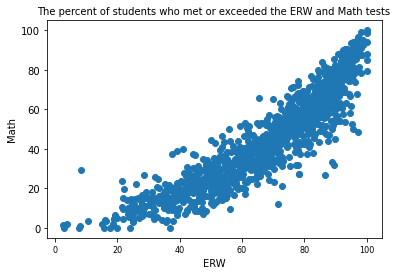

In [165]:
plt.scatter(x=dfs['pcterwbenchmark12'], y=dfs['pctmathbenchmark12'])

plt.title('The percent of students who met or exceeded the ERW and Math tests ', fontsize=10)
plt.xlabel('ERW', fontsize=10)
plt.ylabel('Math', fontsize=10)
plt.xticks(fontsize=8, rotation=0);

In [175]:
dfs['pcterwbenchmark12'].corr(dfs['pctmathbenchmark12'])

0.9141606746458806

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

From the data and analysis we provided above, we can see that Los Angeles is the best county for students to choose if they would like to get higher SAT/ACT scores. Los Angelas not only has the most schools, but also has high percentage of students who met the benchmark of SAT/ACT tests. 

In Los Angeles, here are top 5 schools for the percent of students whose ACT Composite Scores Are Greater or Equal to 21: Whitney High, Academy of the Canyons, La Canada High, Los Angeles Center for Enriched Studies, Arcadia High; Here are top 5 schools for the percent of students who meet the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12: Whitney High, California Academy of Mathematics and Science, La Canada High, San Marino High, South Pasadena Senior High.

We also notice that the performace of SAT ERW test abd SAT Math test are highly related. The schools who have high percent of students who meet or exceed the benchmark for ERW are likely to have hight percent of students to meet or exceed the benchmark for math.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!